## Problem
Accurate and early detection of breast cancer plays a vital role in improving patient outcomes and survival rates. However, existing detection methods often have limitations in terms of accuracy and efficiency. The aim of this project is to develop an advanced breast cancer detection system using Support Vector Machines (SVM) that can effectively classify breast tissue samples as malignant or benign, enabling timely intervention and improved patient care.

## Objective (s)
Develop a breast cancer detection system using Support Vector Machines (SVM) that can accurately classify breast tissue samples as malignant or benign.

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
data = pd.read_csv("../data/diabetes.csv")

## Exploring Data 

In [3]:
# check shape of data 
data.shape

(768, 9)

In [4]:
# dtypes 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# check missing data 
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data['Outcome'] = data['Outcome'].astype('object')

## Descriptive statistics

In [8]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
num_cols.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [10]:
# summary statistics of numerical variables 
num_cols.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,Outcome
0,1
1,0
2,1
3,0
4,1


In [12]:
cat_cols.columns

Index(['Outcome'], dtype='object')

In [13]:
# summary statistics of categorical variables 
cat_cols.describe()

,Outcome
count,768
unique,2
top,0
freq,500


## Correlations between Variables 

In [14]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Skewness 

In [15]:
# skew 
data.skew() 

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: object

## Data visualizations

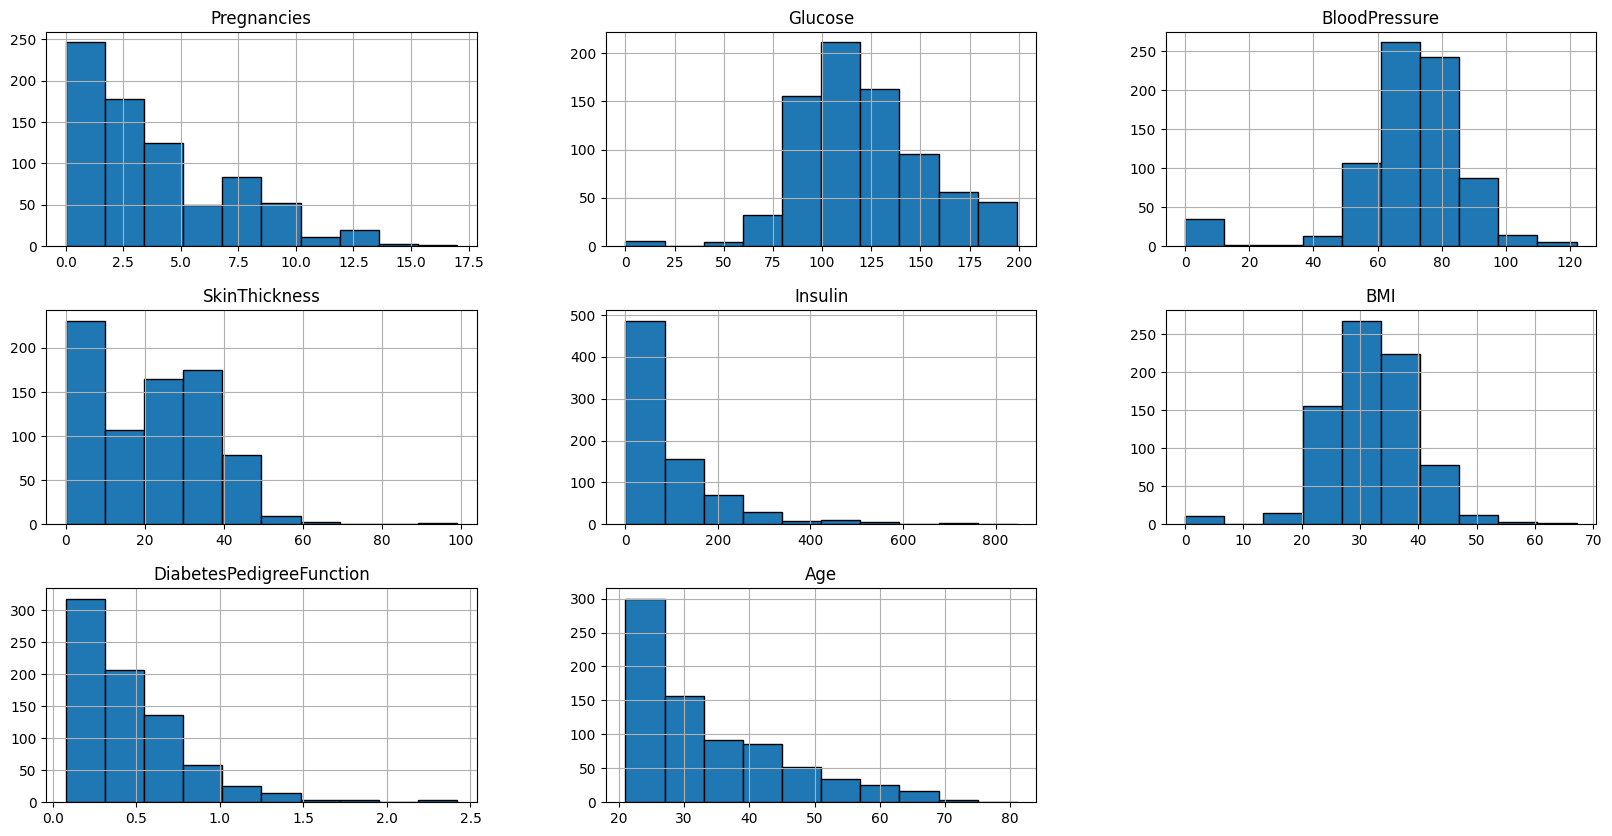

In [16]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

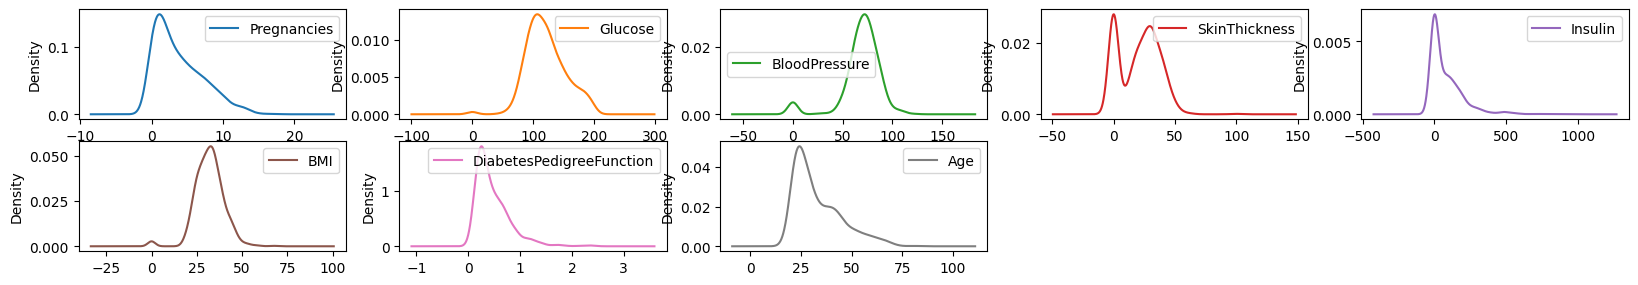

In [17]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(6,5))
plt.show() 

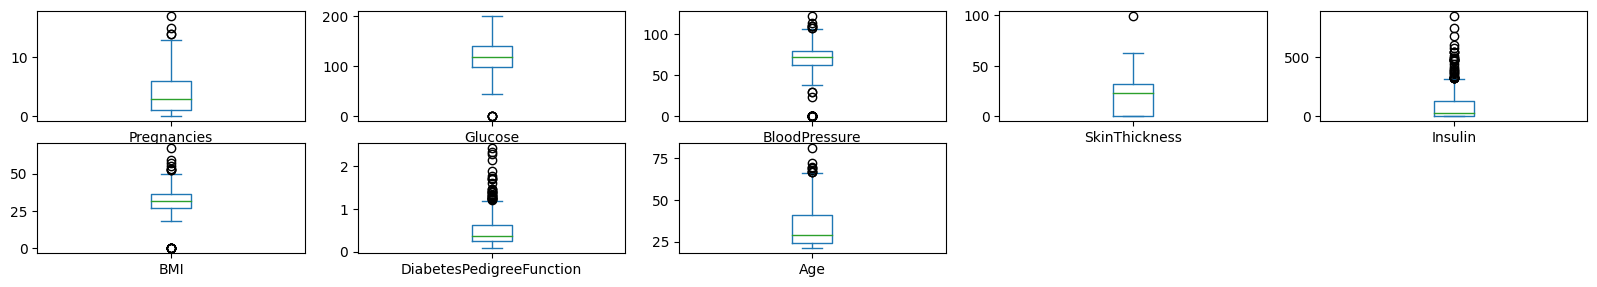

In [18]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(6,5))
plt.show() 

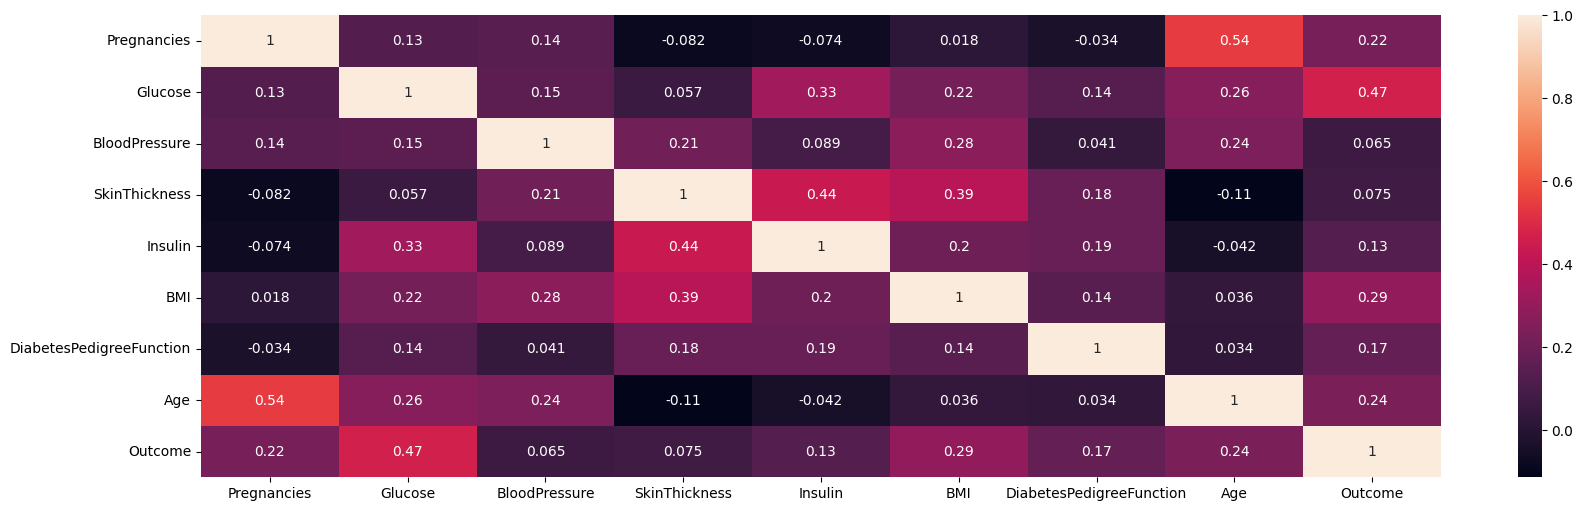

In [19]:
# Multivariate plots with correlations 
plt.figure(figsize=(20,6))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [20]:
# exmine first few rows of data 
data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(
    data, 
    target = 'Outcome', 
    session_id = 123, 
    train_size=.70, 
    numeric_imputation='mean', 
    categorical_imputation='mode', 
    preprocess=True, 
    normalize=True, 
    remove_outliers=True
)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(741, 9)"
5,Transformed train set shape,"(510, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [49]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

## Compare Models 

In [52]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7763,0.7999,0.5442,0.7443,0.6258,0.4727,0.4859,0.0270
lda,Linear Discriminant Analysis,0.7708,0.7998,0.5442,0.7281,0.6201,0.4618,0.4732,0.0240
lr,Logistic Regression,0.7689,0.8018,0.5494,0.7212,0.6193,0.4590,0.4702,0.6680
rf,Random Forest Classifier,0.7503,0.7953,0.5225,0.7027,0.5923,0.4178,0.4321,0.0490
catboost,CatBoost Classifier,0.7429,0.7962,0.5281,0.6685,0.5876,0.4047,0.4122,0.5550
nb,Naive Bayes,0.7391,0.7949,0.6076,0.6404,0.6174,0.4205,0.4260,0.0270
et,Extra Trees Classifier,0.7298,0.7812,0.4962,0.6489,0.5584,0.3697,0.3789,0.0490
gbc,Gradient Boosting Classifier,0.7297,0.7840,0.5389,0.6445,0.5825,0.3853,0.3919,0.0430
qda,Quadratic Discriminant Analysis,0.7280,0.7844,0.5491,0.6443,0.5841,0.3847,0.3941,0.0270
ada,Ada Boost Classifier,0.7278,0.7658,0.5281,0.6314,0.5714,0.3754,0.3808,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Create Model 

In [53]:
# create model 
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.8977,0.7895,0.7895,0.7895,0.6752,0.6752
1,0.7963,0.7835,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.8704,0.9173,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.6852,0.7699,0.4737,0.5625,0.5143,0.2839,0.2862
4,0.8519,0.9068,0.6316,0.9231,0.7500,0.6499,0.6736
5,0.6667,0.6571,0.3158,0.5455,0.4000,0.1913,0.2050
6,0.7593,0.8090,0.5789,0.6875,0.6286,0.4524,0.4561
7,0.7736,0.8762,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6792,0.6841,0.4444,0.5333,0.4848,0.2548,0.2570


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
# print model parameters
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Tune Model 

In [55]:
# tune hyperparameters of rf
tuned_lr = tune_model(lr, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.9098,0.7368,0.8235,0.7778,0.6672,0.6695
1,0.8148,0.7880,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.8519,0.9278,0.6316,0.9231,0.7500,0.6499,0.6736
3,0.7222,0.7714,0.4737,0.6429,0.5455,0.3520,0.3605
4,0.8333,0.9053,0.5789,0.9167,0.7097,0.6010,0.6322
5,0.6667,0.6722,0.3684,0.5385,0.4375,0.2123,0.2200
6,0.7593,0.8090,0.5263,0.7143,0.6061,0.4384,0.4490
7,0.7547,0.8635,0.3889,0.7778,0.5185,0.3776,0.4184
8,0.7358,0.6841,0.4444,0.6667,0.5333,0.3592,0.3736


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [27]:
# to access the tuner object you can set return_tuner = True
tuned_lr, tuner = tune_model(lr, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.8992,0.7368,0.8750,0.8000,0.7051,0.7108
1,0.8148,0.7850,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.8704,0.9353,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7222,0.7744,0.4737,0.6429,0.5455,0.3520,0.3605
4,0.8704,0.9113,0.6842,0.9286,0.7879,0.6976,0.7145
5,0.6481,0.6662,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.8030,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7736,0.8746,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6778,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
tuned_lr

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Pregnancies',
                                                                          'Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age'],
                                                                 transformer=SimpleImputer(ad...
                   param_distributions={'actual_estimator__C': [0.001, 0.002,
                                                                0.003, 0.004,
                                                                0.005, 0.006,
                                                                0.007, 0.008,
                                                                0.009, 0.01,
                                                                0.011, 0.012,
                                                                0.013, 0.014,
                                                                0.015, 0.016,
                                                                0.017, 0.018,
                                                                0.019, 0.02,
                                                                0.021, 0.022,
                                                                0.023, 0.024,
                                                                0.025, 0.026,
                                                                0.027, 0.028,
                                                                0.029, 0.03, ...],
                                        'actual_estimator__class_weight': ['balanced',
                                                                           {}]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [30]:
ensemble_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.9038,0.6842,0.8667,0.7647,0.6588,0.6686
1,0.8148,0.8000,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.8704,0.9278,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7222,0.7880,0.5789,0.6111,0.5946,0.3836,0.3839
4,0.8704,0.9038,0.6842,0.9286,0.7879,0.6976,0.7145
5,0.6481,0.6602,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.8015,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7736,0.8762,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6794,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=LogisticRegression(C=1.0, class_weight=None,
                                               dual=False, fit_intercept=True,
                                               intercept_scaling=1,
                                               l1_ratio=None, max_iter=1000,
                                               multi_class='auto', n_jobs=None,
                                               penalty='l2', random_state=123,
                                               solver='lbfgs', tol=0.0001,
                                               verbose=0, warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

## Analyze Model 

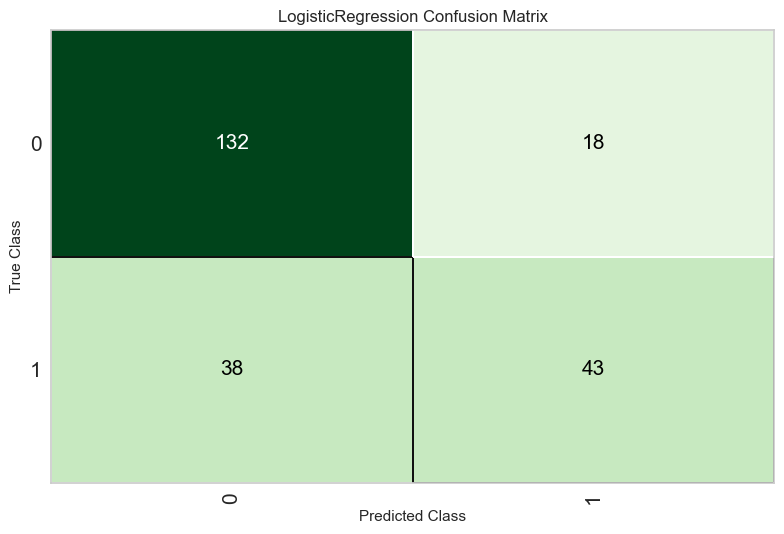

In [31]:
# plot confusion matrix
plot_model(lr, plot = 'confusion_matrix')

In [ ]:
# plot AUC
plot_model(lr, plot = 'auc')

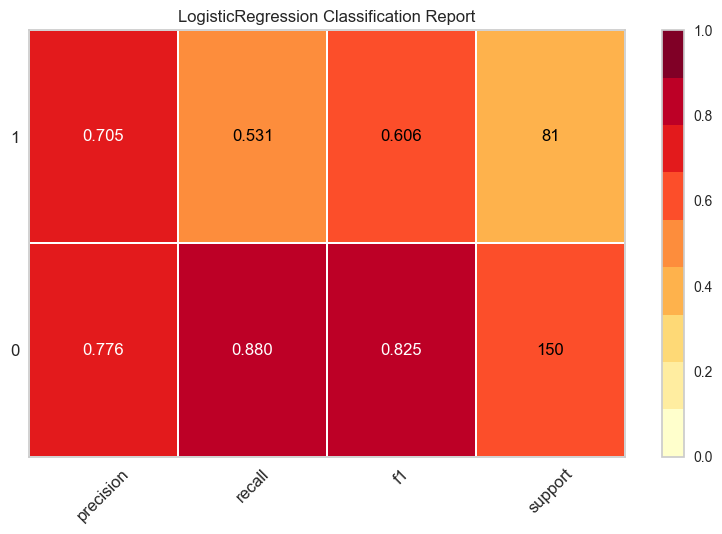

In [36]:
# plot class report
plot_model(lr, plot = 'class_report')

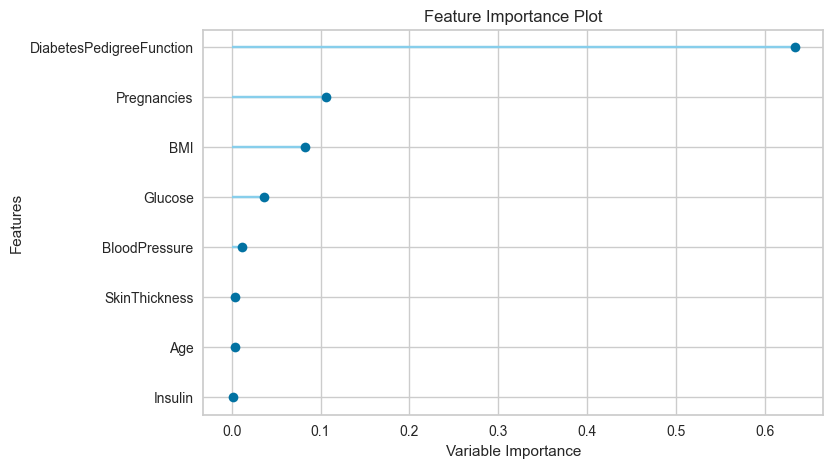

In [37]:
# plot feature importance
plot_model(lr, plot = 'feature')

## Evaluate Model 

In [38]:
# evaluate model 
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [39]:
# finalize a model
finalize_model(lr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                (...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Prediction

In [40]:
# predict on test set
holdout_pred = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


In [41]:
# show predictions df
holdout_pred.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6392


In [42]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('Outcome', axis=1, inplace=True)
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [43]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0.9419
2,8,183,64,0,0,23.299999,0.672,32,1,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0.9454
4,0,137,40,35,168,43.099998,2.288,33,1,0.8395


## Save Model 

In [ ]:
# save pipeline
save_model(et, '../models/breast_cancer')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('../models/breast_cancer')
loaded_best_pipeline